# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [469]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [470]:
!pwd

/Users/Lola/Documents/Dami_repo/Week 2/Project/Notebooks


In [471]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
#pd.options.display.max_rows = 2000

path = "../assets/billboard.csv"
db = pd.read_csv(path)
#db.describe()

##### Write a brief description of your data, and any interesting observations you've made thus far. 

The data contain information on songs at the top of the Billboard chart in the year 2000. The data higlights with each song it's artist, genre, length, date it entered the chart and date it reached its peak on the chart. The data also shows that songs's rating for every week it was on the chart. One interesting observation in this data is timing: time does have the same starting point for all the songs i.e. Week 1 for Song A would not have the same date as Week for Song B. 

The summarry statistics of the data is shown below:

In [472]:
db.describe()

,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

To clean the data, we start off by re-naming the heading for the weeks columns:

In [473]:
def cleanVal(val):
    if "week" in x.lower():
        valsplitted = val.split(".")
        newList = valsplitted[0]
        newNewList = newList.replace("x","_")
        tooManyNewList = newNewList.replace("st","").replace("nd","").replace("rd","").replace("th","")
        newVal = valsplitted[1] + " " + tooManyNewList
        return newVal
    return val
finalVal = [cleanVal(x) for x in db.columns.tolist()]
db.columns = finalVal
db

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week _1,week _2,week _3,...,week _67,week _68,week _69,week _70,week _71,week _72,week _73,week _74,week _75,week _76
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [474]:
def cleanVal(val):
    if "week" in x.lower():
        valsplitted = val.split("_")
        newL = int(valsplitted[1])
        return newL
    return val
finalVal2 = [cleanVal(x) for x in db.columns.tolist()]
db.columns = finalVal2

colA = db.columns[0:7].tolist()
colB = db.columns[7:].tolist()

db_1 = pd.melt(db, id_vars=(colA), var_name= "week", value_vars=(colB), value_name= "ranking")
db1 = db_1.sort_values(["track","week"], ascending=True)
db2 = db1.dropna(axis=0, how='any')
db2

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking
47,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,1,100.0
364,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,2,99.0
681,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,3,96.0
998,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,4,76.0
1315,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,5,55.0
1632,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,6,37.0
1949,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,7,24.0
2266,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,8,24.0
2583,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,9,30.0
2900,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,10,36.0


In [475]:
db2.dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
week                object
ranking            float64
dtype: object

Variable|Description|Type of Variable
---|---|---
Year|Year of ranking for songs|Integer
Artist.inverted|Artist of the song|Object
Track|Name of the song|Object
Time|Length of the song|Object
Genre|Song genre|Object
Date.Entered|Date song entered the chart|Object
Date.Peaked|Date song peaked on the chart|Object
Week|Number of weeks of song on the chart|Object
Ranking|Rank of song on the chart|Float

In [476]:
db2["entryDate"] = pd.to_datetime(db2["date.entered"])
db2["peakDate"] = pd.to_datetime(db2["date.peaked"])
db2["daysToPeak"] = (db2["peakDate"]  - db2["entryDate"]).dt.days

db2

/Users/Lola/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Lola/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Lola/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking,entryDate,peakDate,daysToPeak
47,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,1,100.0,2000-04-29,2000-09-16,140
364,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,2,99.0,2000-04-29,2000-09-16,140
681,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,3,96.0,2000-04-29,2000-09-16,140
998,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,4,76.0,2000-04-29,2000-09-16,140
1315,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,5,55.0,2000-04-29,2000-09-16,140
1632,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,6,37.0,2000-04-29,2000-09-16,140
1949,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,7,24.0,2000-04-29,2000-09-16,140
2266,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,8,24.0,2000-04-29,2000-09-16,140
2583,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,9,30.0,2000-04-29,2000-09-16,140
2900,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,10,36.0,2000-04-29,2000-09-16,140


In [477]:
newData = db[ db.columns[:7] ]
allweeks = db[ db.columns[7:]]
highestRank = []
for i in range(len(allweeks)):
    highestRank.append((min(allweeks.iloc[i,:])))
newData["Highest Rank"] = highestRank
newData

/Users/Lola/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,year,artist.inverted,track,time,genre,date.entered,date.peaked,Highest Rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1.0
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,1.0
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,1.0
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,1.0
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,1.0
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,1.0


In [478]:
!pwd

/Users/Lola/Documents/Dami_repo/Week 2/Project/Notebooks


In [479]:
#db2.to_csv("/Users/Lola/Documents/Dami_repo/Week 2/Project/assets/newBillboard.csv")

## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

We first create a bar graph that gives us an idea of the more popular genres of music in the 2000 Bill board chart:

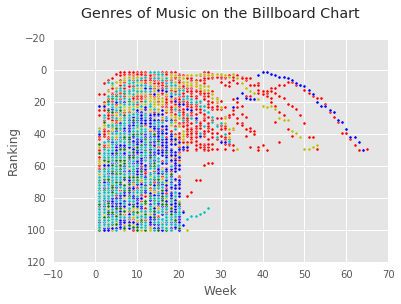

In [480]:
db2.Category = np.select([db2.genre == "Rock", db2.genre == "Rap", db2.genre == "Country", db2.genre == "R&B"], 
                           ["Rock","Rap","Country","R&B"],"Other")
for colours, label in zip('rybgc', ["Rock","Rap","Country","R&B", "Other"]):
    data = db2[db2.Category == label]
    plt.scatter(data.week, data.ranking, s=10, c=colours, label=str(label))   
plt.title("Genres of Music on the Billboard Chart\n")
plt.xlabel("Week")
plt.ylabel("Ranking")
plt.gca().invert_yaxis()


In [481]:
db2

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,ranking,entryDate,peakDate,daysToPeak
47,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,1,100.0,2000-04-29,2000-09-16,140
364,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,2,99.0,2000-04-29,2000-09-16,140
681,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,3,96.0,2000-04-29,2000-09-16,140
998,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,4,76.0,2000-04-29,2000-09-16,140
1315,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,5,55.0,2000-04-29,2000-09-16,140
1632,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,6,37.0,2000-04-29,2000-09-16,140
1949,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,7,24.0,2000-04-29,2000-09-16,140
2266,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,8,24.0,2000-04-29,2000-09-16,140
2583,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,9,30.0,2000-04-29,2000-09-16,140
2900,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,10,36.0,2000-04-29,2000-09-16,140


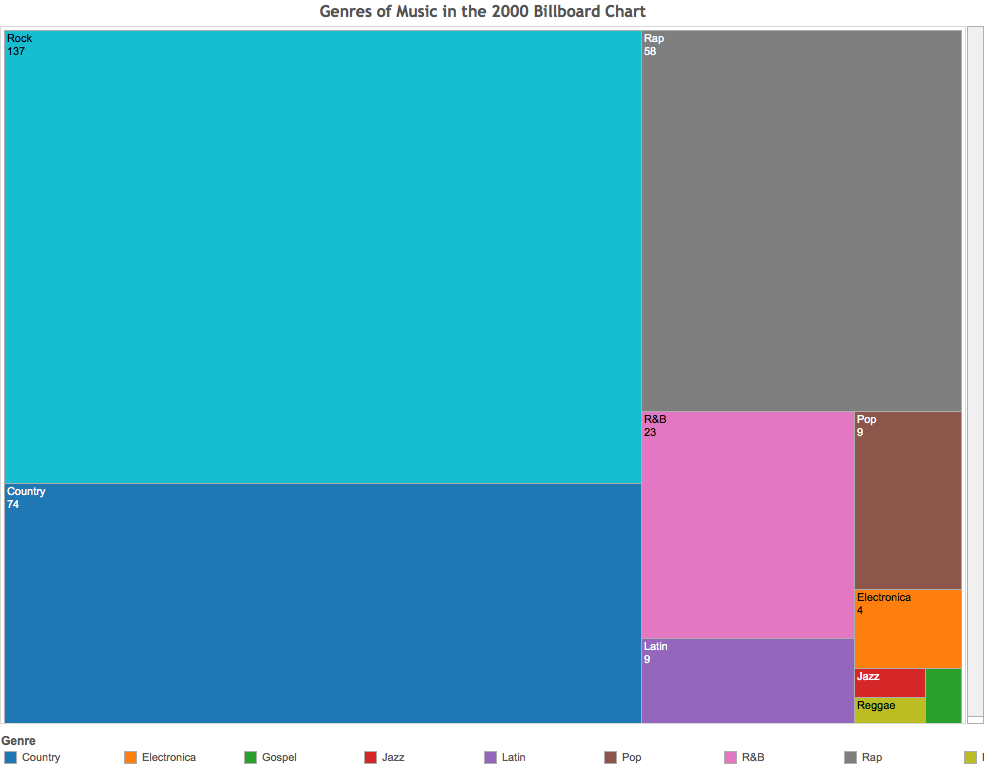

In [482]:
#newData.to_csv("/Users/Lola/Documents/Dami_repo/Week 2/Project/assets/newData.csv")
from IPython.display import Image
Image(filename="../assets/newDataTreemap.png")

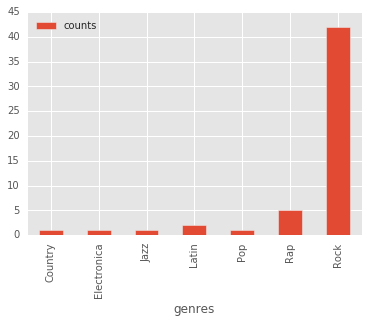

In [483]:
import seaborn as sns
#topTen = newData["genre"].where(newData["Highest Rank"]<=10).value_counts()
#for col, genre in zip( ['r','r','r','r','r'], ["Rock","Rap","Latin","Pop", "Jazz", "Country", "Electronica"]):

topTen = newData[ newData["Highest Rank"] <= 10 ].groupby("genre")

genres = []
counts = []

for key, group in topTen:
    genres.append( key )
    counts.append( len(group) )

dfToGraph = pd.DataFrame( {"genres" : genres, "counts": counts} )
dfToGraph.plot(kind = "bar", x = "genres", y = "counts")


#["genre"].where(newData["Highest Rank"]<=10).value_counts()



#topTendf = pd.DataFrame(topTen)
#genre = topTendf["genre"]

#def getColor(genre):
#    if genre == "Rock":
#        return "red"
#    elif genre =="Rap":
#        return "blue"
#    elif genre == "Latin":
#        return "yellow"
#    elif genre == "Pop":
#        return green
#    elif genre == "Jazz":
#        return "pink"
#    elif genre == "Country":
#        return "cyan"
#    elif genre == "Electronica":
#        return "black"


#col = [getColor(y) for y in topTendf]

#print col

#clrs = ['grey' for x in topTendf if (x == "Rock") else 'red']
#print clrs
#topTendf
#g = sns.barplot(topTen.index, topTen, color=col)
#sns.plt.title("Genres of Music in the Top 10\n")
#sns.plt.xlabel("# of times present in top 10")
#sns.plt.ylabel("Genre")

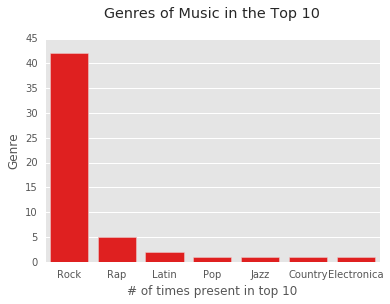

In [484]:
import seaborn as sns
topTen = newData["genre"].where(newData["Highest Rank"]<=10).value_counts()
for col, genre in zip( ['r','r','r','r','r'], ["Rock","Rap","Latin","Pop", "Jazz", "Country", "Electronica"]):
    g = sns.barplot(topTen.index, topTen, color=col)
sns.plt.title("Genres of Music in the Top 10\n")
sns.plt.xlabel("# of times present in top 10")
sns.plt.ylabel("Genre")

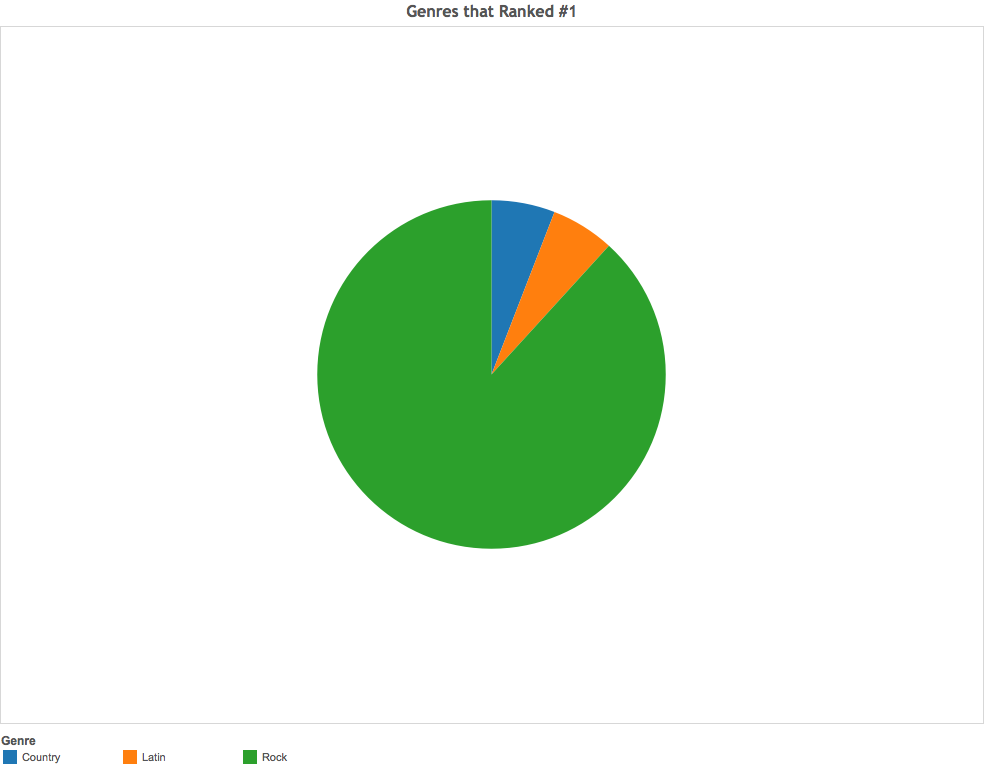

In [485]:
numOne = newData["genre"].where(newData["Highest Rank"]<=1).value_counts()
numOnedf = pd.DataFrame(numOne)
numOnedf.to_csv("/Users/Lola/Documents/Dami_repo/Week 2/Project/assets/numOne.csv")
Image(filename="../assets/numOne.png")

From the chart above, we see that Rock music was the most popular genre in the 2000 Billboard Charts, with Gospel, Raggae and Jazz being the least popular. 

We also want to find out 

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

In the year 2000, it appears to be the case that people listened more to Rock music than any other genre. This information is however only representative for that period of time. We are not certain that rock is current the most popular genre. It may be the case that taste in genre of music has evolved over time. It may also be the case that the current music-loving population is difference from that of year 2000.

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 

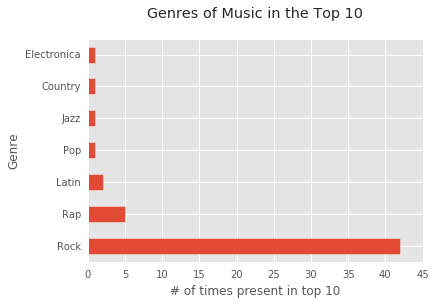

In [486]:
topTendf = pd.DataFrame(topTen)
topTen.plot(kind="barh")
plt.title("Genres of Music in the Top 10\n")
plt.xlabel("# of times present in top 10")
plt.ylabel("Genre")

In [487]:
#pivotList4.plot.bar(title = "Genres of Music Ranked #1\n")

In [488]:
#pivotList = pd.pivot_table(db2, index = ["track"], values = ["ranking", "genre"], aggfunc = [np.min])
#pivotList.columns.tolist()
#ranking  = pivotList.columns[1]
#pivotList2 = pivotList.sort_values(ranking, ascending=True)

#pivotList3 = pivotList2.iloc[:17,:]
#pivotList4 = pd.pivot_table(pivotList3, index =[pivotList.columns[0]], values = [pivotList.columns[1]], aggfunc = np.sum)
#pivotList3
#pivotList5 = pivotList3.to_dict(orient='records')
#pivotList5
#genre = pivotList.columns[0]
#pivotList5 = pivotList4.set_index(ranking)[genre].to_dict()
#pivotList4.to_csv("/Users/Lola/Documents/Dami_repo/Week 2/Project/assets/pivotList.csv")

#pivotList6 = ["genre":v for (k,v) in zip(keys, )]
#pivotList4.plot.bar(title = "Genres of Music Ranked #1\n")

In [489]:
#is there a relationship between the let of time the track peaks and how long it peaked for?

In [490]:
#justList3 = justList2[('amin', 'ranking')].tolist()
#def getNumOne(var):
#    if i == 1:
#        return i
#    return var
#newList = [getNumOne(i) for i in justList3]
#newList
